# Data Cleaning
### Tolong baca perintah dan tagar komen dengan saksama :)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Scalling untuk MinMax Scaller
from sklearn.preprocessing import MinMaxScaler
# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# B. Outlier Handling

### Outlier Handling : InterQuartile Handling

In [ ]:
# untuk plot Q-Q
import scipy.stats as stats

In [ ]:
df_california = pd.read_csv('california_dataset.csv')

In [ ]:
from sklearn.model_selection import train_test_split
# splitting terlebih dahulu

train_cal, test_cal = train_test_split(df_california, train_size= 0.8, test_size = 0.2, random_state=42)

#NOTES :
#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)
#data train di-handling outliernya
#tapi tidak untuk data test, karena data test ibarat representasi data masa depan yang digunakan untuk melihat performa Machine Learning

### Assignment 1.a :
1. lakukan looping untuk melihat plot distribusi data dan outlier pada kolom-kolom : ['MedInc', 'HouseAge', 'AveRooms','AveBedrms', 'AveOccup'] di california_dataset.csv
2. Daftar nama kolom yang Anda cek, kolom_kolom = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']
3. Lakukan untuk tujuan machine learning dan juga exploratory data analysis.

In [ ]:
# Assignment 1.a : lakukan looping untuk melihat plot distribusi data dan outlier pada kolom-kolom : ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup'] di california_dataset.csv
# Daftar nama kolom yang ingin Anda cek

def check_plot(df, variable):
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    df[variable].hist(bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # Boxplot
    plt.subplot(1, 3, 3)
    df.boxplot(column=variable)
    plt.title('Boxplot')

    plt.suptitle(f'Check Plot untuk {variable}')
    plt.show()

Ini merupakan langkah yang disiapkan untuk menampilkan sebaran data dalam bentuk grafis/plot.

### untuk tujuan machine learning

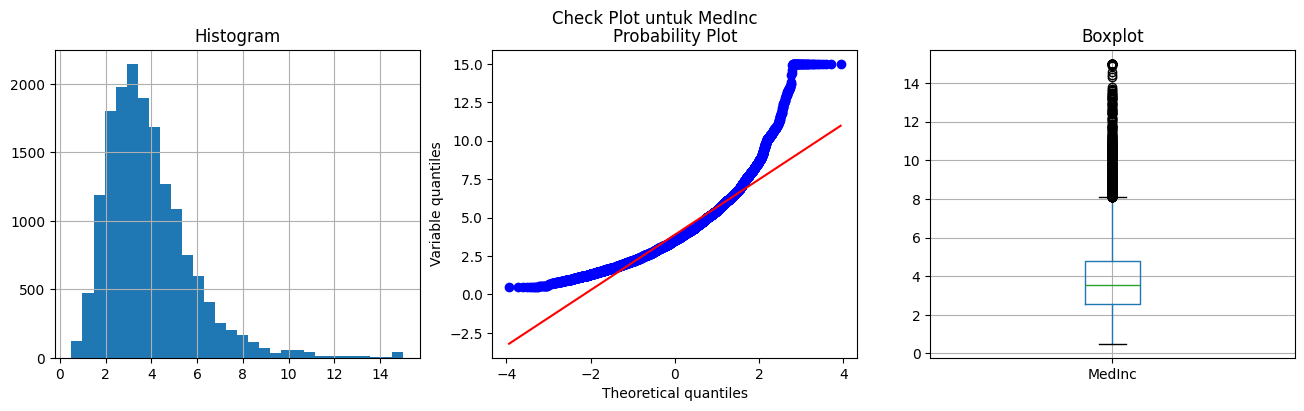

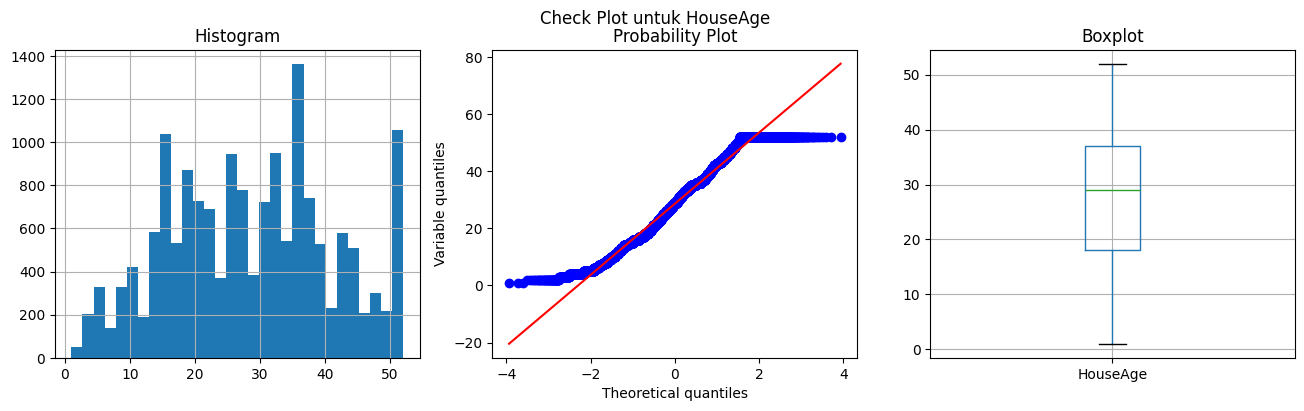

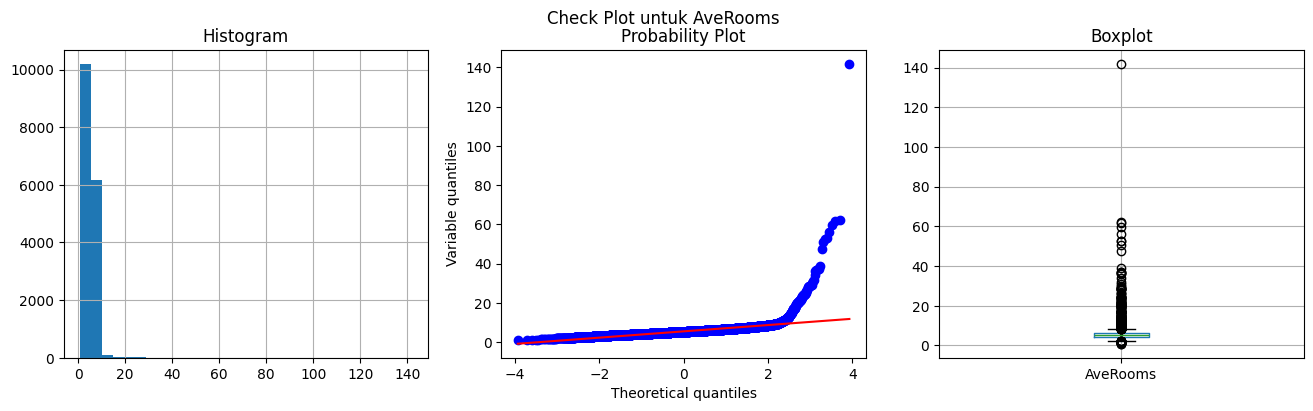

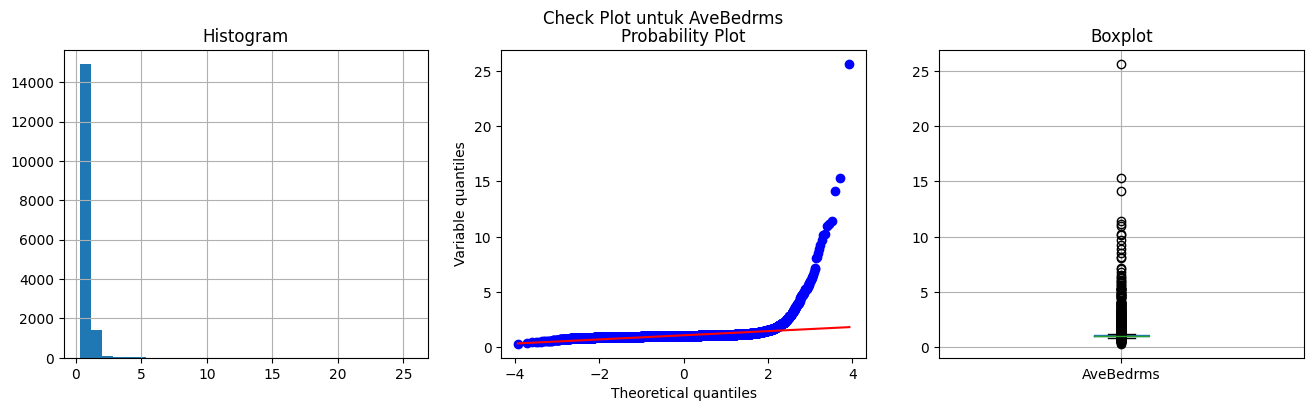

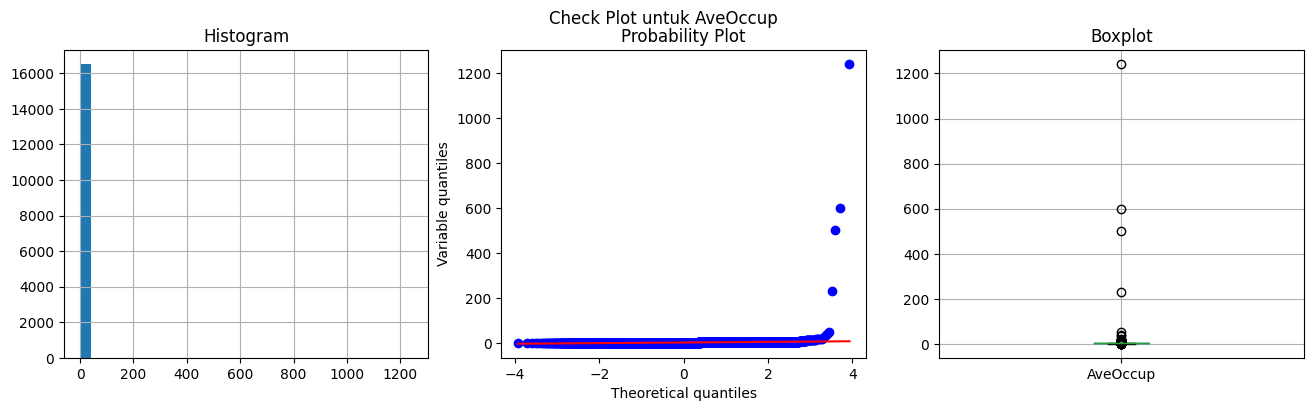

In [ ]:
kolom_kolom =  ['MedInc', 'HouseAge', 'AveRooms','AveBedrms', 'AveOccup']

for col in kolom_kolom:
    check_plot(train_cal, col)

#### Insight

*   for loop digunakan agar plot bisa ditampilkan secara bersamaan pada kolom  
    kolom yang sudah di tentukan.

*   hasil dari plot diatas adalah jumlah sebaran data yang diambil dari data train, untuk tujuan machine learning. Yang mana data ini sebelum handling outlier

*   Ditunjukan pada plot diatas sebaran dari 5 kolom yang telah di tentukan, menunjukan bahwa ada banyak jumlah outlier yang menyebabkan sebaran data menjadi tidak normal.

*   Ditunjukan dengan Histogram dimana bar pada rentan nilai 0 jauh lebih tinggi dibandingkan nilai lainnya


*   Pada probability plot ditunjukan rentan nilai yang juga tidak normal,


*   begitu juga dengan barplot sebaran data tiddak normal ditunjukan dengan jumlah titik yang ada diluar dari bar dan bar juga tidak terlihat/ terhimpit dengan banyaknya outlier


*   Namun, terlihat pada kolom HouseAge sebaran data terlihat normal yang mana bisa di asumsikan tidak adanya outlier.




### untuk exploratory data analysis

In [ ]:
data_clf_EDA = df_california.copy()

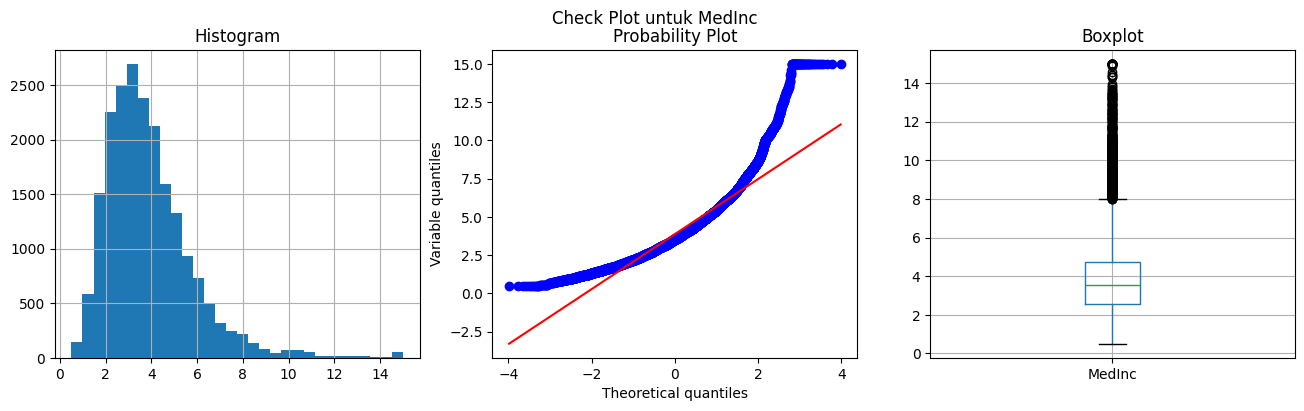

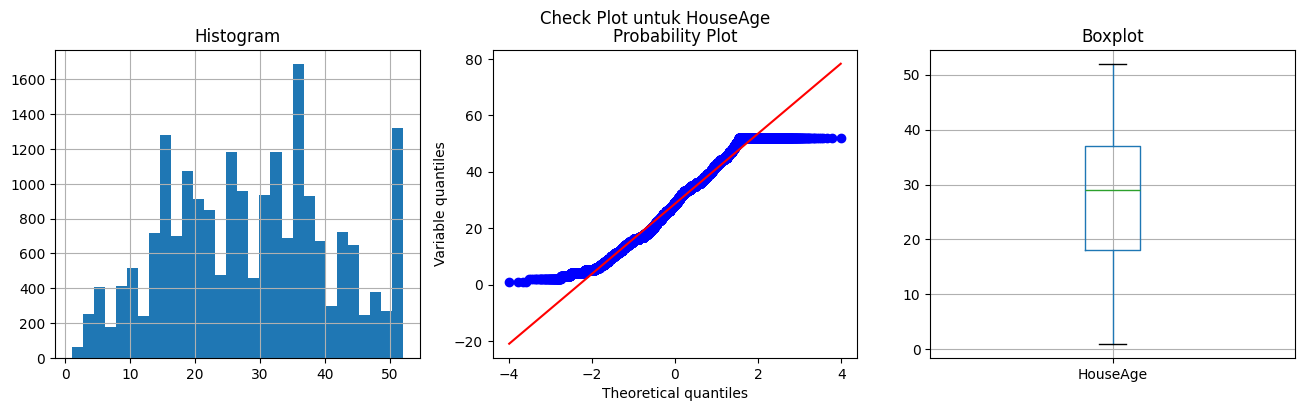

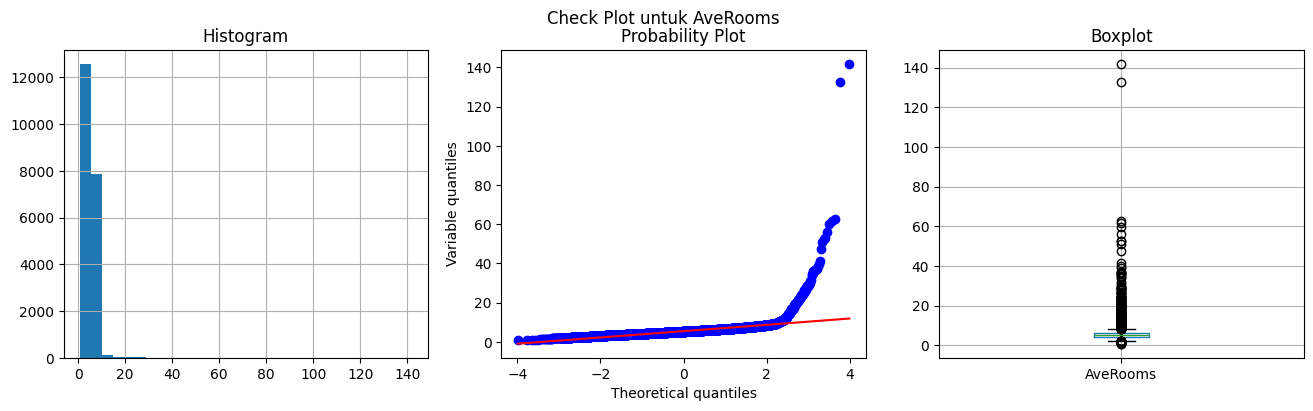

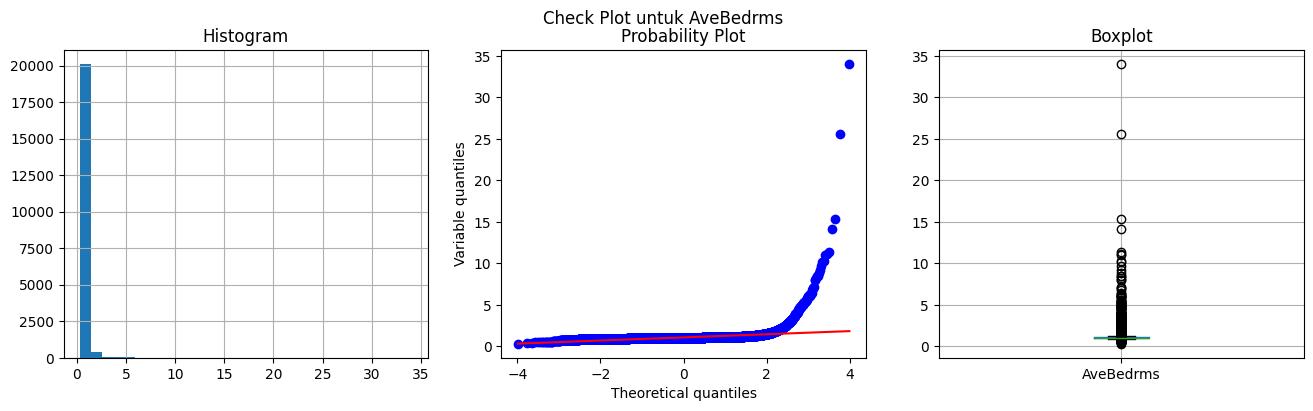

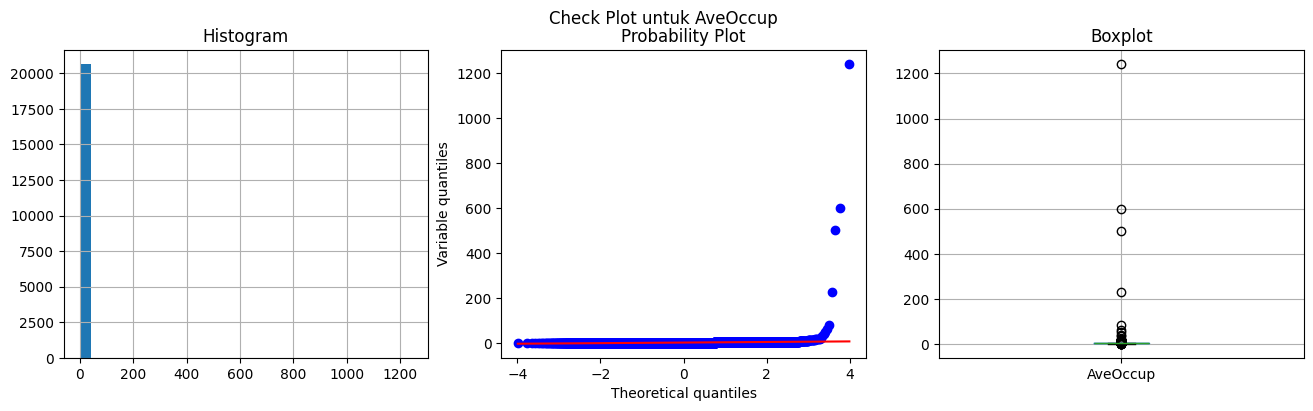

In [ ]:
for col in kolom_kolom:
    check_plot(data_clf_EDA, col)

#### Insight

*   for loop digunakan agar plot bisa ditampilkan secara bersamaan pada kolom  
    kolom yang sudah di tentukan.

*   hasil dari plot diatas adalah jumlah sebaran data yang diambil dari dataframe full, untuk tujuan EDA. Yang mana data ini sebelum handling outlier

*   Ditunjukan pada plot diatas sebaran dari 5 kolom yang telah di tentukan, menunjukan bahwa ada banyak jumlah outlier yang menyebabkan sebaran data menjadi tidak normal.

*   Ditunjukan dengan Histogram dimana bar pada rentan nilai 0 jauh lebih tinggi dibandingkan nilai lainnya


*   Pada probability plot ditunjukan rentan nilai yang juga tidak normal,


*   begitu juga dengan barplot sebaran data tiddak normal ditunjukan dengan jumlah titik yang ada diluar dari bar dan bar juga tidak terlihat/ terhimpit dengan banyaknya outlier


*   Namun, terlihat pada kolom HouseAge sebaran data terlihat normal yang mana bisa di asumsikan tidak adanya outlier.




### Assignment 1.b
1. Lakukan handling outlier pilih 1 kolom saja yang di handling dengan IQR setelah mengecek distribusinya
2. Dan cek distribusinya kembali
3. untuk tujuan machine learning dan juga exploratory data analysis.

In [ ]:
### untuk tujuan machine learning
### Assignment 1.b Lakukan handling outlier pilih 1 kolom saja yang di handling dengan IQR setelah mengecek distribusinya
### Dan cek distribusinya kembali


### untuk tujuan machine learning

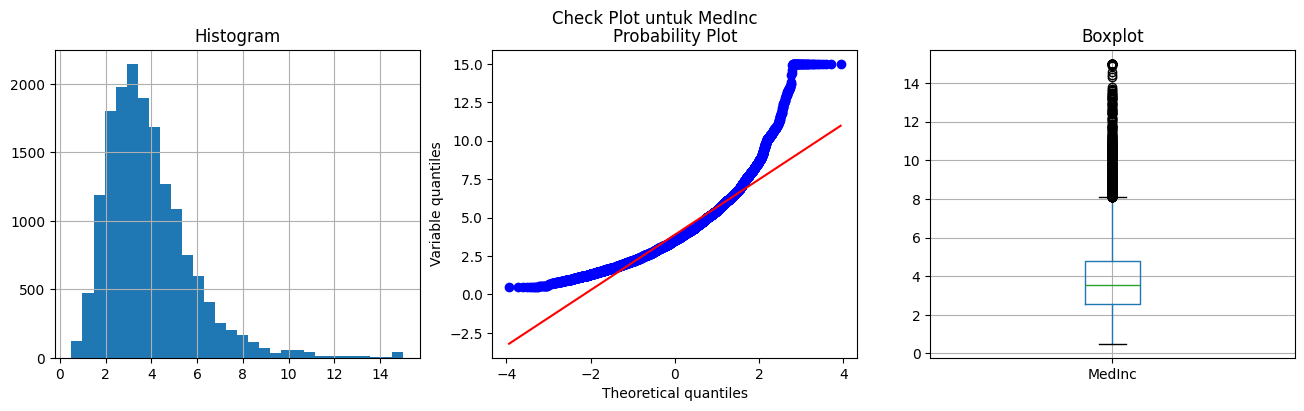

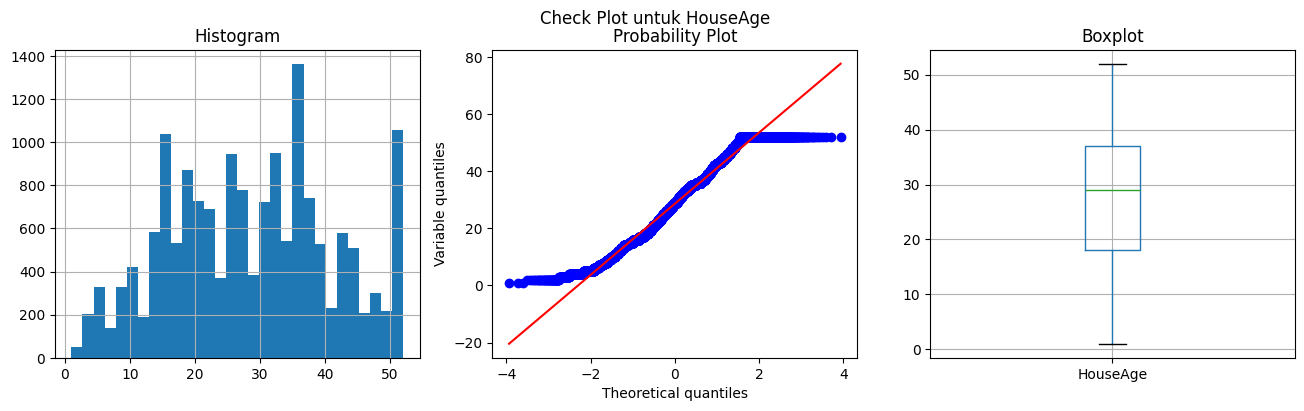

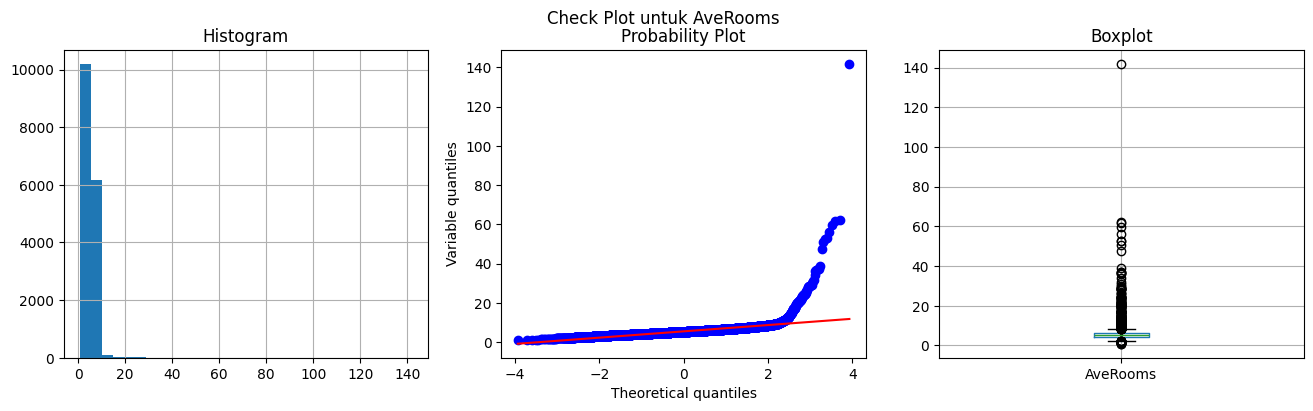

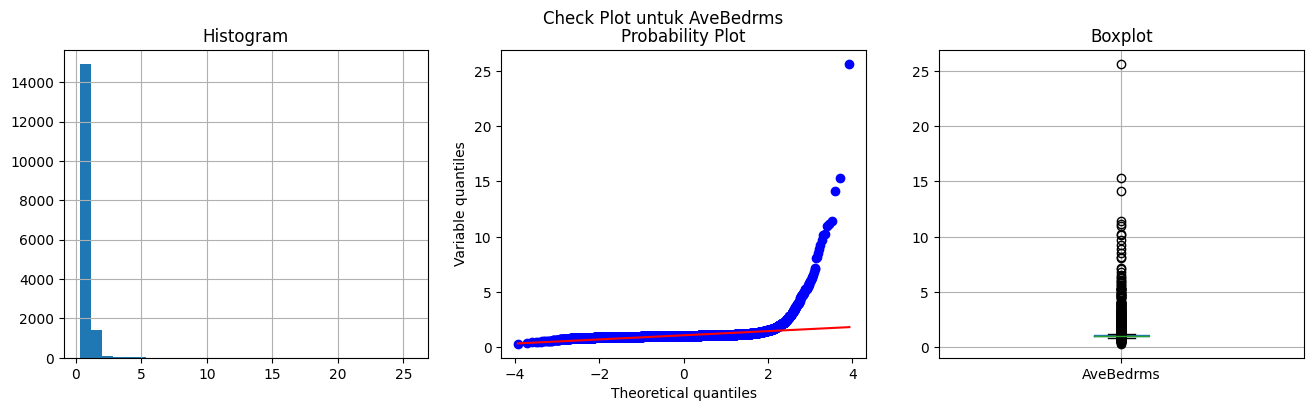

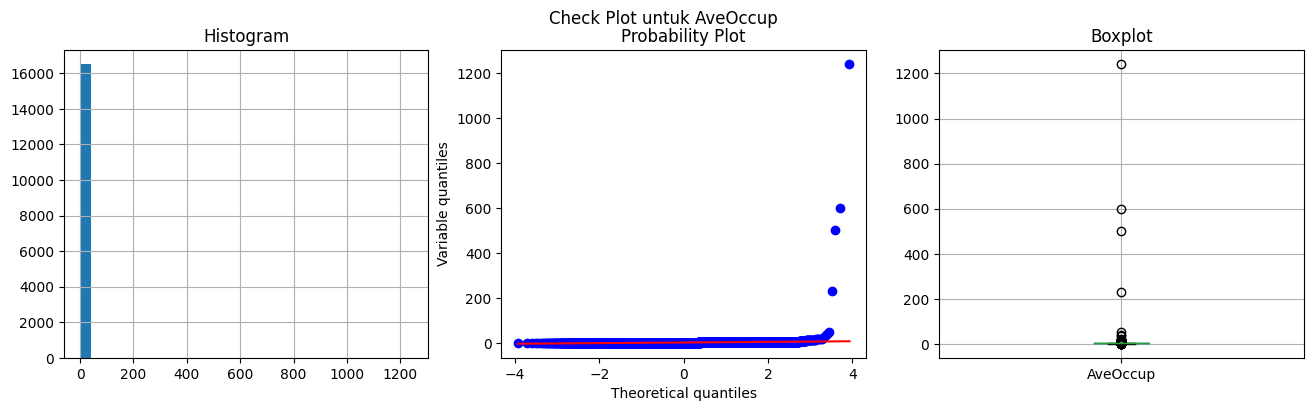

In [ ]:
# Melakukan loop untuk mengecek distribusi tiap kolom
kolom_kolom =  ['MedInc', 'HouseAge', 'AveRooms','AveBedrms', 'AveOccup']

for col in kolom_kolom:
    check_plot(train_cal, col)

In [ ]:
Q1 = train_cal['AveBedrms'].quantile(0.25)
Q3 = train_cal['AveBedrms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Menentukan batas atas dan batas bawah, sebelum melakukan handling outlier

In [ ]:
before = len(train_cal)
train_cal = train_cal[(train_cal['AveBedrms'] >= lower_bound) & (train_cal['AveBedrms'] <= upper_bound)]
after = len(train_cal)
print(f"Outlier AveBedrms dihapus: {before - after} baris")

Outlier AveBedrms dihapus: 1153 baris


Melakukan Handling outlier pada kolom 'Avebedrms' berdasarkan ambang batas yang sudah di tentukan pada cell sebelumnya

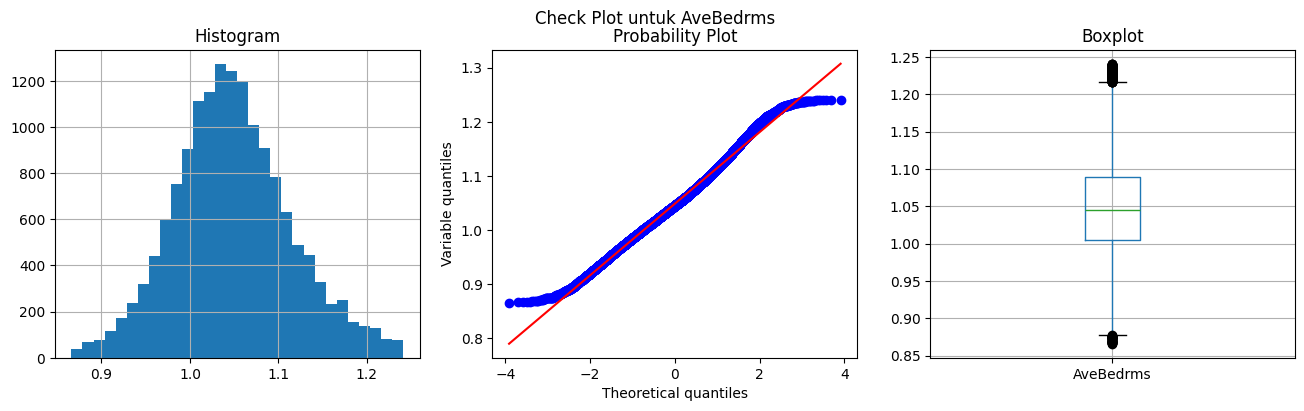

In [ ]:
check_plot(train_cal, 'AveBedrms')

Pengecekan kembali setelah dilakukan handling pada kolom AveBedrms

#### Insight


*   Kolom `AveBedrms` dipilih untuk dilakukan handling outlier karena terlihat memiliki distribusi yang tidak normal dan terdapat nilai ekstrem. Handling dilakukan menggunakan metode IQR, dan hasilnya ditampilkan kembali untuk melihat perubahan distribusinya. Proses ini dilakukan baik untuk data eksplorasi (EDA) maupun untuk data latih model (ML).

*   Terlihat setelah dilakukan handling outlier pada kolom `AveBedrms` sebaran data menjadi normal. Meskipun masih terdapat outlier namun kondisi ini jauh lebih baik dibandingkan dengan sebelum dilakukan handling outlier.


### untuk exploratory data analysis

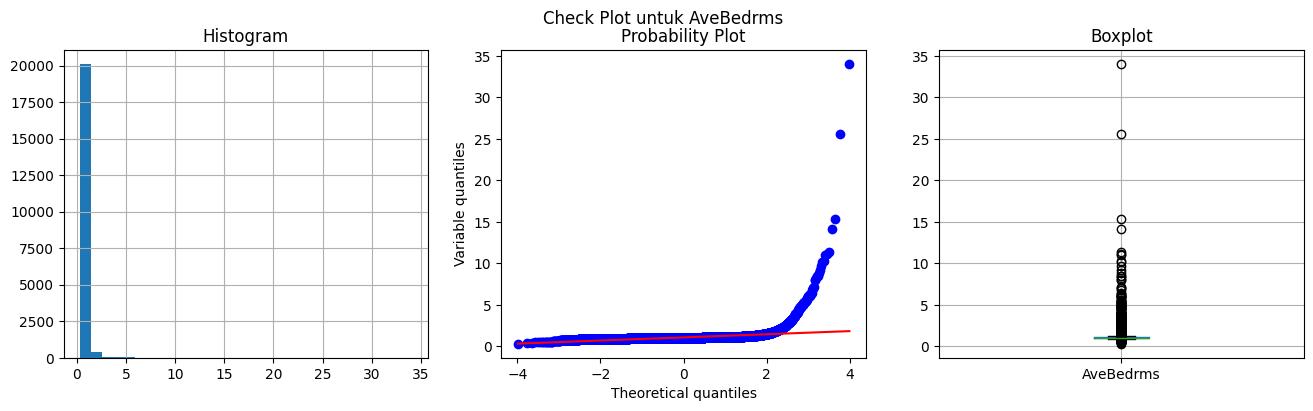

In [ ]:
check_plot(data_clf_EDA, 'AveBedrms')

In [ ]:
Q1 = data_clf_EDA['AveBedrms'].quantile(0.25)
Q3 = data_clf_EDA['AveBedrms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
before = len(data_clf_EDA)
data_clf_EDA = data_clf_EDA[(data_clf_EDA['AveBedrms'] >= lower_bound) & (data_clf_EDA['AveBedrms'] <= upper_bound)]
after = len(data_clf_EDA)
print(f"Outlier AveBedrms dihapus: {before - after} baris")

Outlier AveBedrms dihapus: 1424 baris


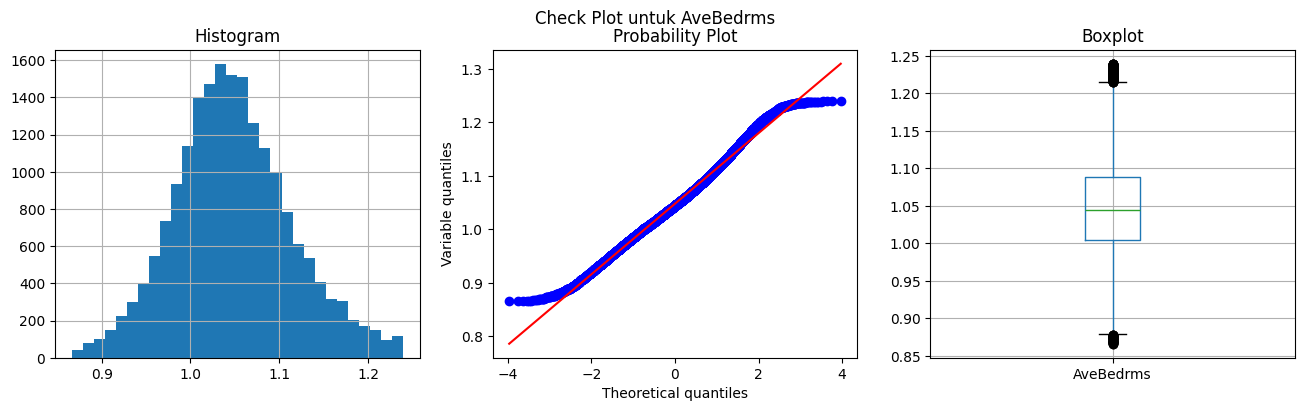

In [ ]:
check_plot(data_clf_EDA, 'AveBedrms')

#### Insight

*   Kolom `AveBedrms` dipilih untuk dilakukan handling outlier karena terlihat memiliki distribusi yang tidak normal dan terdapat nilai ekstrem. Handling dilakukan menggunakan metode IQR, dan hasilnya ditampilkan kembali untuk melihat perubahan distribusinya. Proses ini dilakukan baik untuk data eksplorasi (EDA) maupun untuk data latih model (ML).

*   Terlihat setelah dilakukan handling outlier pada kolom `AveBedrms` sebaran data menjadi normal. Meskipun masih terdapat outlier namun kondisi ini jauh lebih baik dibandingkan dengan sebelum dilakukan handling outlier.





# C. Missing Value Handling
Missing Value Merupakan nilai yang hilang di suatu kolom, namun tidak hanya sebatas itu. Untuk nilai yang tidak sesuai tapi muncul didalam suatu kolom tertentu juga bisa dianggap sebagai missing value. Misal tipenya kategorikal tapi isinya ada yang berupa angka dan juga sebaliknya.

In [ ]:
df_company = pd.read_csv('company.csv')

### Aturan missing value handling :
1. jika tipe datanya itu **numerik** -> handling menggunakan **median** (robust / tahan terhadap outlier)
2. jika tipe datanya itu **kategorik / object / string** -> handling menggunakan **mode / modus**

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting terlebih dahulu

train_company, test_company = train_test_split(df_company,train_size= 0.8, test_size = 0.2, random_state=42)

#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)

## Assignment 2. Missing Value Handling :
1. Cek persentase missing value hanya pada kolom Headquarters di company.csv, Cek jenis missing valuenya apakah ada atau tidak ?
2. apakah di drop atau tidak (gunakan syarat drop kolom jika > 20%)
3. jika tidak maka handling, dan dengan cara apa handling nilainya, median atau modus ?
4. Lakukan untuk tujuan machine learning dan juga exploratory data analysis.

### untuk tujuan machine learning

In [ ]:
100 * len(df_company[df_company['Headquarters'].isin(['-1','Unknown'])]) / len(df_company)

4.613095238095238

In [ ]:
train_mode_headquarters = train_company[~train_company['Headquarters'].isin(['-1','Unknown'])]['Headquarters'].mode()[0]
train_mode_headquarters

'New York, NY'

In [ ]:
#Tulis jawaban missing value handling kolom Headquarters disini
train_company['Headquarters'] = train_company['Headquarters'].apply(lambda x: train_mode_headquarters if x in ['-1','Unknown'] else x)
test_company['Headquarters'] = test_company['Headquarters'].apply(lambda x: train_mode_headquarters if x in ['-1','Unknown'] else x)

### untuk exploratory data analysis

In [ ]:
company_EDA = df_company.copy()

In [ ]:
full_mode_Headquarters = company_EDA[~company_EDA['Headquarters'].isin(['-1','Unknown'])]['Headquarters'].mode()[0]
full_mode_Headquarters

'New York, NY'

In [ ]:
#Tulis jawaban missing value handling kolom Headquarters disini
company_EDA['Headquarters'] = company_EDA['Headquarters'].apply(lambda x: full_mode_Headquarters if x in ['-1','Unknown'] else x)

#### Insight

*   Melihat presentase jumlah missing value pada kolom `Headquarters`, yang mana di tunjukan nilai presentasenya adalah 4% (4.613095238095238)

*   Maka dari hasil presentase yang di tunjukan, kita akan lanjut handling missing valuenya. Dan tidak akan melakukan drop kolom, karena presentase dibawah 20%

*   Karena kolom `Headquarters` tergolong dalam jenis kategorikal, maka handling dilakukan dengan cara mengambil modus/mode pada kolom `Headquarters`

*   nilai yang sering keluar pada kolom `Headquarters` adalah New York, NY

*   Handling missing value dilakukan dengan lambda function. Yang mana nilai yang akan dimasukan adalah New York, NY



# D. Encoding
Definisi : Mengubah tipe kategorikal menjadi numerikal dengan pendekatan aturan encoding untuk persiapan sebelum dilakukannya machine learning modelling. Teknik Encoding yang umum dipakai :
1. One Hot Encoding (OHE) : Lakukan pada kolom gender
2. Label Encoding / Ordinal Encoding : Lakukan pada kolom Yes dan No, Jika Yes menjadi 1 , Jika No menjadi 0. Sebagai Contohnya di kolom  Partner, Dependents.
3. Mean Encoding : Contract

In [ ]:
df_churn = pd.read_csv('Telco-Customer-Churn.csv')

In [ ]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Assignment 3.a Label Encoder :

0. Lakukan label encoder pada 'Partner', 'Dependents' juga sama seperti yang telah dibahas dikelas, **lalu anda wajib melakukan** :
1. Pilih kolom-kolom yang terindikasi bersifat Data Ordinal.
2. Ganti nilai yang tidak sesuai : No internet service menjadi No lalu validasi dengan value_counts
3. Kemudian lakukan label Encoder
4. Lakukan untuk tujuan machine learning dan juga exploratory data analysis.
5. Notes : gunakan Telco-Customer-Churn.csv

In [ ]:
df_churn['Churn'] = df_churn['Churn'].replace({'Yes': 1, 'No': 0})

<ipython-input-227-2ee6453c8439>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_churn['Churn'] = df_churn['Churn'].replace({'Yes': 1, 'No': 0})


In [ ]:
df_churn['StreamingMovies'] = df_churn['StreamingMovies'].replace({'No internet service':'No'})
df_churn['StreamingTV'] = df_churn['StreamingTV'].replace({'No internet service':'No'})
df_churn['TechSupport'] = df_churn['TechSupport'].replace({'No internet service':'No'})
df_churn['DeviceProtection'] = df_churn['DeviceProtection'].replace({'No internet service':'No'})
df_churn['OnlineBackup'] = df_churn['OnlineBackup'].replace({'No internet service':'No'})
df_churn['OnlineSecurity'] = df_churn['OnlineSecurity'].replace({'No internet service':'No'})
df_churn['MultipleLines'] = df_churn['MultipleLines'].replace({'No phone service':'No'})

In [ ]:
custom_columns = ['StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'MultipleLines', 'Churn']

for column in custom_columns:
    print(f"============= {column} =================")
    display(df_churn[column].value_counts())
    print()

============= StreamingMovies =================


,count
StreamingMovies,
No,4311
Yes,2732



============= StreamingTV =================


,count
StreamingTV,
No,4336
Yes,2707



============= TechSupport =================


,count
TechSupport,
No,4999
Yes,2044



============= DeviceProtection =================


,count
DeviceProtection,
No,4621
Yes,2422



============= OnlineBackup =================


,count
OnlineBackup,
No,4614
Yes,2429



============= OnlineSecurity =================


,count
OnlineSecurity,
No,5024
Yes,2019



============= MultipleLines =================


,count
MultipleLines,
No,4072
Yes,2971



============= Churn =================


,count
Churn,
0,5174
1,1869


In [ ]:
#Splitting terlebih dahulu
train_churn, test_churn = train_test_split(df_churn, test_size=0.2, random_state=42)

#### Insight



*   Value churn diubah menjadi Yes= 1 dan No=0
ini dilakukan agar nantinya machine learning bisa lebih mudah mempelajari data.

*   'No internet service' dan 'No phone service' diubah menajadi NO. agar data dapat di seragamkan menjadi YES dan NO



### untuk tujuan machine learning

In [ ]:
#Tulis jawaban
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Partner', 'Dependents','PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

label_encoder = LabelEncoder()

In [ ]:
for col in columns_to_encode:
  print(col)

Partner
Dependents
PhoneService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling


In [ ]:
for col in columns_to_encode:
    train_churn[col] = label_encoder.fit_transform(train_churn[col])

In [ ]:
for col in columns_to_encode:
    test_churn[col] = label_encoder.transform(test_churn[col])

In [ ]:
train_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2142,4223-BKEOR,Female,0,0,1,21,1,No,DSL,1,0,1,0,0,1,One year,0,Mailed check,64.85,1336.8,0
1623,6035-RIIOM,Female,0,0,0,54,1,Yes,Fiber optic,0,1,0,0,1,1,Two year,1,Bank transfer (automatic),97.20,5129.45,0
6074,3797-VTIDR,Male,0,1,0,1,0,No,DSL,0,0,0,0,0,0,Month-to-month,1,Electronic check,23.45,23.45,1
1362,2568-BRGYX,Male,0,0,0,4,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.20,237.95,1
6754,2775-SEFEE,Male,0,0,1,0,1,Yes,DSL,1,1,0,1,0,0,Two year,1,Bank transfer (automatic),61.90,,0


In [ ]:
test_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,1,0,1,0,No,DSL,0,0,0,0,0,0,Month-to-month,1,Electronic check,24.80,24.8,1
2715,0484-JPBRU,Male,0,0,0,41,1,Yes,No,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),25.25,996.45,0
3825,3620-EHIMZ,Female,0,1,1,52,1,No,No,0,0,0,0,0,0,Two year,0,Mailed check,19.35,1031.7,0
1807,6910-HADCM,Female,0,0,0,1,1,No,Fiber optic,0,0,1,0,0,0,Month-to-month,0,Electronic check,76.35,76.35,1
132,8587-XYZSF,Male,0,0,0,67,1,No,DSL,0,0,0,1,0,0,Two year,0,Bank transfer (automatic),50.55,3260.1,0


### untuk exploratory data analysis

In [ ]:
EDA_churn = df_churn.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Partner', 'Dependents','PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

labelEncoder = LabelEncoder()

In [ ]:
# Menerapkan label encoding ke data full
for col in columns_to_encode:
    EDA_churn[col] = labelEncoder.fit_transform(EDA_churn[col])

In [ ]:
EDA_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


#### Insight



*   Setelah melakukan penyesuaian pada nilai 'No internet service' dan 'No phone service' diubah menajadi NO.

*   Maka terdaapat 10 data ordinal, Partner
Dependents
PhoneService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling

*   Dari 10 data ordinal maka saya melakukan labelencoder unutk ML dan juga EDA

*   yang mana tujuan dari labelencoder ini agar pada ML terdapat nilai yang pasti, karna telah diubah yes=1 no=0


## 3.b Assignment Mean Encoding
1. Lakukan kolom Mean Encoding pada InternetService

In [ ]:
# Tulis jawaban
dict_InternetService = train_churn.groupby(['InternetService'])['Churn'].mean().to_dict()
dict_InternetService

{'DSL': 0.1918514698298092,
 'Fiber optic': 0.41555824264409513,
 'No': 0.07660626029654036}

In [ ]:
dict_PaymentMethod = train_churn.groupby(['PaymentMethod'])['Churn'].mean().to_dict()
dict_PaymentMethod

{'Bank transfer (automatic)': 0.17447495961227788,
 'Credit card (automatic)': 0.15240423797881011,
 'Electronic check': 0.44992050874403816,
 'Mailed check': 0.19032761310452417}

In [ ]:
dict_contract = train_churn.groupby(['Contract'])['Churn'].mean().to_dict()
dict_contract

{'Month-to-month': 0.4265325981187155,
 'One year': 0.11798679867986799,
 'Two year': 0.028379387602688575}

#### Insight

*   Selain Melakukan Mean Encoding pada InternetService, saya juga mengambil keputusan untuk melakukan Mean Encoding pada 2 table nominal lainnya yaitu, PaymentMethod, dan Contract


##### Insight InternetService

*   Pada InternetService terdapat 2 variasi layanan yaitu, (DSL dan Fiber) Optic, dan satu lagi tidak menggunakan Internet atau (NO)

* Pelanggan dengan layanan DSL memiliki tingkat churn sekitar 19,2%. Ini berarti sekitar 1 dari 5 pelanggan DSL cenderung berhenti berlangganan.

* Pelanggan dengan layanan Fiber optic memiliki tingkat churn yang lebih tinggi, yaitu sekitar 41,6%. Ini menunjukkan bahwa hampir 2 dari 5 pelanggan Fiber optic berpotensi berhenti berlangganan, yang bisa menjadi perhatian khusus bagi penyedia layanan.

* Pelanggan yang tidak menggunakan layanan internet (No) memiliki tingkat churn yang paling rendah, sekitar 7,7%. Ini mungkin karena mereka tidak tergantung pada layanan internet sehingga lebih sedikit alasan untuk berhenti.



##### Insight PaymentMethod

* Pelanggan yang menggunakan Bank transfer (automatic) memiliki tingkat churn sekitar 17,4%, artinya sekitar 1 dari 6 pelanggan dengan metode ini cenderung berhenti berlangganan.

* Pelanggan dengan Credit card (automatic) memiliki tingkat churn yang sedikit lebih rendah, sekitar 15,2%, menunjukkan loyalitas yang sedikit lebih baik dibandingkan bank transfer.

* Metode Electronic check memiliki tingkat churn tertinggi, yaitu sekitar 45%, hampir setengah dari pelanggan yang menggunakan metode ini berpotensi berhenti berlangganan. Ini bisa menjadi area yang perlu diperhatikan untuk perbaikan layanan atau strategi retensi.

* Pelanggan yang membayar dengan Mailed check memiliki tingkat churn sekitar 19%, lebih tinggi dari metode otomatis tapi jauh lebih rendah dibanding electronic check.


##### Insight Contact

* Pelanggan dengan kontrak Month-to-month memiliki tingkat churn yang cukup tinggi, sekitar 42,7%. Ini menunjukkan bahwa pelanggan dengan kontrak bulanan lebih rentan untuk berhenti berlangganan.

* Pelanggan dengan kontrak One year memiliki tingkat churn yang jauh lebih rendah, sekitar 11,8%, menandakan bahwa kontrak satu tahun memberikan loyalitas yang lebih baik.

* Pelanggan dengan kontrak Two year memiliki tingkat churn paling rendah, hanya sekitar 2,8%, yang menunjukkan bahwa kontrak dua tahun sangat efektif dalam mempertahankan pelanggan.

### untuk tujuan machine learning

In [ ]:
train_churn['InternetService'] = train_churn['InternetService'].map(dict_InternetService)
test_churn['InternetService'] = test_churn['InternetService'].map(dict_InternetService)

In [ ]:
train_churn['PaymentMethod'] = train_churn['PaymentMethod'].map(dict_PaymentMethod)
test_churn['PaymentMethod'] = test_churn['PaymentMethod'].map(dict_PaymentMethod)

In [ ]:
train_churn['Contract'] = train_churn['Contract'].map(dict_contract)
test_churn['Contract'] = test_churn['Contract'].map(dict_contract)

Mengubah nilai pada data train dan test, berdasarkan nilai dari masing-masing dict

In [ ]:
train_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2142,4223-BKEOR,Female,0,0,1,21,1,No,0.191851,1,0,1,0,0,1,0.117987,0,0.190328,64.85,1336.8,0
1623,6035-RIIOM,Female,0,0,0,54,1,Yes,0.415558,0,1,0,0,1,1,0.028379,1,0.174475,97.20,5129.45,0
6074,3797-VTIDR,Male,0,1,0,1,0,No,0.191851,0,0,0,0,0,0,0.426533,1,0.449921,23.45,23.45,1
1362,2568-BRGYX,Male,0,0,0,4,1,No,0.415558,0,0,0,0,0,0,0.426533,1,0.449921,70.20,237.95,1
6754,2775-SEFEE,Male,0,0,1,0,1,Yes,0.191851,1,1,0,1,0,0,0.028379,1,0.174475,61.90,,0


In [ ]:
test_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,1,0,1,0,No,0.191851,0,0,0,0,0,0,0.426533,1,0.449921,24.80,24.8,1
2715,0484-JPBRU,Male,0,0,0,41,1,Yes,0.076606,0,0,0,0,0,0,0.426533,1,0.174475,25.25,996.45,0
3825,3620-EHIMZ,Female,0,1,1,52,1,No,0.076606,0,0,0,0,0,0,0.028379,0,0.190328,19.35,1031.7,0
1807,6910-HADCM,Female,0,0,0,1,1,No,0.415558,0,0,1,0,0,0,0.426533,0,0.449921,76.35,76.35,1
132,8587-XYZSF,Male,0,0,0,67,1,No,0.191851,0,0,0,1,0,0,0.028379,0,0.174475,50.55,3260.1,0


### untuk exploratory data analysis

In [ ]:
dict_InternetService_EDA = EDA_churn.groupby(['InternetService'])['Churn'].mean().to_dict()
dict_InternetService_EDA

{'DSL': 0.1895910780669145,
 'Fiber optic': 0.4189276485788114,
 'No': 0.07404980340760157}

In [ ]:
dict_PaymentMethod_EDA = EDA_churn.groupby(['PaymentMethod'])['Churn'].mean().to_dict()
dict_PaymentMethod_EDA

{'Bank transfer (automatic)': 0.16709844559585493,
 'Credit card (automatic)': 0.15243101182654403,
 'Electronic check': 0.4528541226215645,
 'Mailed check': 0.19106699751861042}

In [ ]:
dict_contract_EDA = EDA_churn.groupby(['Contract'])['Churn'].mean().to_dict()
dict_contract_EDA

{'Month-to-month': 0.4270967741935484,
 'One year': 0.11269517990495587,
 'Two year': 0.02831858407079646}

In [ ]:
EDA_churn['InternetService'] = EDA_churn['InternetService'].map(dict_InternetService_EDA)

In [ ]:
EDA_churn['PaymentMethod'] = EDA_churn['PaymentMethod'].map(dict_PaymentMethod_EDA)

In [ ]:
EDA_churn['Contract'] = EDA_churn['Contract'].map(dict_contract_EDA)

##### Insight

* Pelanggan dengan layanan DSL memiliki tingkat churn sekitar 18,96%, artinya hampir 1 dari 5 pelanggan DSL berhenti berlangganan.

* Pelanggan dengan layanan Fiber optic memiliki tingkat churn yang lebih tinggi, sekitar 41,9%, menunjukkan bahwa pelanggan dengan layanan ini lebih rentan untuk berhenti.

* Pelanggan yang tidak menggunakan layanan internet (No) memiliki tingkat churn yang paling rendah, sekitar 7,4%, yang masuk akal karena mereka mungkin tidak terpengaruh oleh layanan internet.

* Pelanggan yang menggunakan Bank transfer (automatic) memiliki tingkat churn sekitar 16,7%, artinya sekitar 1 dari 6 pelanggan dengan metode ini cenderung berhenti berlangganan.

* Pelanggan dengan Credit card (automatic) memiliki tingkat churn sekitar 15,2%, sedikit lebih rendah dibandingkan bank transfer, menunjukkan loyalitas yang sedikit lebih baik.

* Metode Electronic check memiliki tingkat churn tertinggi, yaitu sekitar 45,3%, yang berarti hampir setengah dari pelanggan dengan metode ini berpotensi berhenti berlangganan. Ini bisa menjadi area yang perlu diperhatikan oleh perusahaan.

* Pelanggan yang menggunakan Mailed check memiliki tingkat churn sekitar 19,1%, lebih tinggi dari metode otomatis tapi jauh lebih rendah dari electronic check.

* Pelanggan dengan kontrak Month-to-month memiliki tingkat churn sekitar 42,7%, yang berarti hampir setengah dari pelanggan dengan kontrak bulanan cenderung berhenti berlangganan. Ini menunjukkan bahwa kontrak bulanan memiliki risiko churn yang tinggi.

* Pelanggan dengan kontrak One year memiliki tingkat churn yang jauh lebih rendah, sekitar 11,3%, menandakan bahwa kontrak satu tahun memberikan loyalitas yang lebih baik dibandingkan kontrak bulanan.

* Pelanggan dengan kontrak Two year memiliki tingkat churn paling rendah, sekitar 2,8%, yang menunjukkan bahwa kontrak dua tahun sangat efektif dalam mempertahankan pelanggan.

## Thank you :)